<a href="https://colab.research.google.com/github/berbir12/ML-Regression/blob/main/Position_Salaries_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("/content/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [5]:
rfr = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rfr.fit(X,Y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [9]:
oob_score = rfr.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

pred = rfr.predict(X)

mse = mean_squared_error(Y, pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y, pred)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.6819214296245728
Mean Squared Error: 2384100000.0
R-squared: 0.9704434230386582


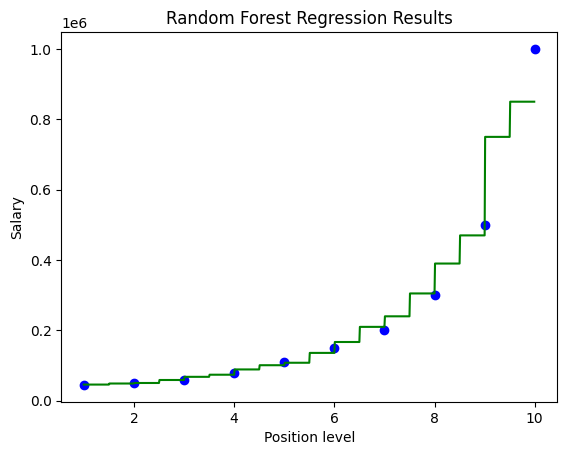

In [11]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,Y, color='blue') #plotting real points
plt.plot(X_grid, rfr.predict(X_grid),color='green') #plotting for predict points

plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()